# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [19]:
X_train = pd.read_csv("X_train_M17.csv")
X_test = pd.read_csv("X_test_M17.csv")
y_train = pd.read_csv("y_train_M17.csv")
y_test = pd.read_csv("y_test_M17.csv")

print("Tamanho de X_train:", X_train.shape)
print("Tamanho de X_test: ", X_test.shape)
print("Tamanho de y_train:", y_train.shape)
print("Tamanho de y_test: ", y_test.shape)

Tamanho de X_train: (261, 10)
Tamanho de X_test:  (32, 10)
Tamanho de y_train: (261, 1)
Tamanho de y_test:  (32, 1)


# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

Para a aplicação do algoritmo deve-se seguir os seguintes passos:

1.   Análise: Os dados são análisados, coluna a coluna, buscando por possíveis valores nulos ou faltantes. Além disso, nessa etapa gráficos sobre as varíaveis são plotados buscando possíveis outliers.

2.   Tratamento: Os dados faltas e outliers são avaliados e tratados, seja eliminando as linhas com esses valores ou subistituindo por outros valores como a média para valores numéricos ou moda para valores categóricos, por exemplo, seja mantendo os outilier do jeito que estão. Importante que nessa etapa não existam elementos faltantes nas linhas.

3.   Balanceamento: Para que o treinamento ocorra de forma mais eficiente, é importante balancear os dados para que exista uma quantidade semelhante de elementos da coluna foco evitando possivel enviesamento do modelo. Em um banco de dados com muitas entradas de uma determinada categoria e poucas de outra, o modelo pode acabar se especializando em encontrar apenas um tipo de dado, reduzindo sua capacidade de abstração.

4.   Treinamento: Aqui os dados são separados em treino e teste. Depois, passam pelo treinamento em si que depende do tipo de algoritmo escolhido como a árvore de decisão ou regressão multipla, por exemplo.

5.   Avaliação: Os dados de teste são utilizados para avaliar o modelo usando métricas como accuracy, recall e F1 score para identificar a qualidade do modelo. Um F1 abaixo de 0.5, por exemplo, demonstra um péssimo modelo já que ele apresenta um acurácia abaixo do aleatório, assim como um F1 de 1 pode demonstrar que o modelo está muito especializado nos dados de treino e possui uma baixa capacidade de abstração, o que também é ruim.

6.   Refinamento: Após os resultados do modelo, novas estratégias podem ser tomadas para melhorar a qualidade do modelo. Nessa etapa, o desenvolvimento do modelo é reavaliado, buscando possíveis erros que podem ter ocorrido além de tentar novas abordagens como troca do algoritmo usado, ou uso de apenas as variáveis mais relevantes ao dado que se deseja prever, entre outras.




# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modedlo com os dados de treino.

In [20]:
arvore_score = DecisionTreeClassifier(criterion='gini', random_state=0)
arvore_score.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [21]:
previsao_treino = arvore_score.predict(X_train)
relatorio_treino = classification_report(y_train, previsao_treino)
print(f" Relatório treino: \n {relatorio_treino}")

 Relatório treino: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        87
           2       1.00      1.00      1.00        87

    accuracy                           1.00       261
   macro avg       1.00      1.00      1.00       261
weighted avg       1.00      1.00      1.00       261



# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [22]:
previsao_teste = arvore_score.predict(X_test)
relatorio_teste = classification_report(y_test, previsao_teste)
print(f" Relatório teste: \n {relatorio_teste}")

 Relatório teste: 
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.91      1.00      0.95        21
           2       1.00      1.00      1.00         3

    accuracy                           0.94        32
   macro avg       0.97      0.92      0.94        32
weighted avg       0.94      0.94      0.93        32



O modelo apresenta uma performace menor com os dados de teste do que com o treino. Além disso, apresenta um F1 score de 1 nas entradas de treino, demonstrando um problema de overfit. Como a quantidade de dados é muito baixa (pouco mais de 100 elementos) esse tipo de problema é esperado. O ideal seria treinar o modelo com uma base mais robusta.

# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

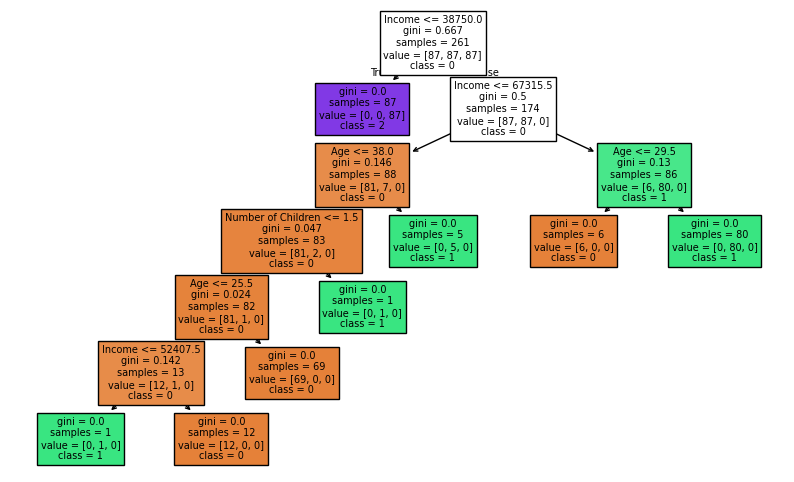

In [23]:
plt.figure(figsize=(10,6))
plot_tree(arvore_score, filled=True, feature_names=X_train.columns, class_names=['0', '1', '2'])
plt.show()

In [24]:
arvore_score.get_depth()

6

Por ser um data frame de poucas colunas é possivel plotar todos os galhos gerados pela arvore de decisão. A arvore apresenta profundidade 6.

# 6) Identifique as 2 principais features do modelo.


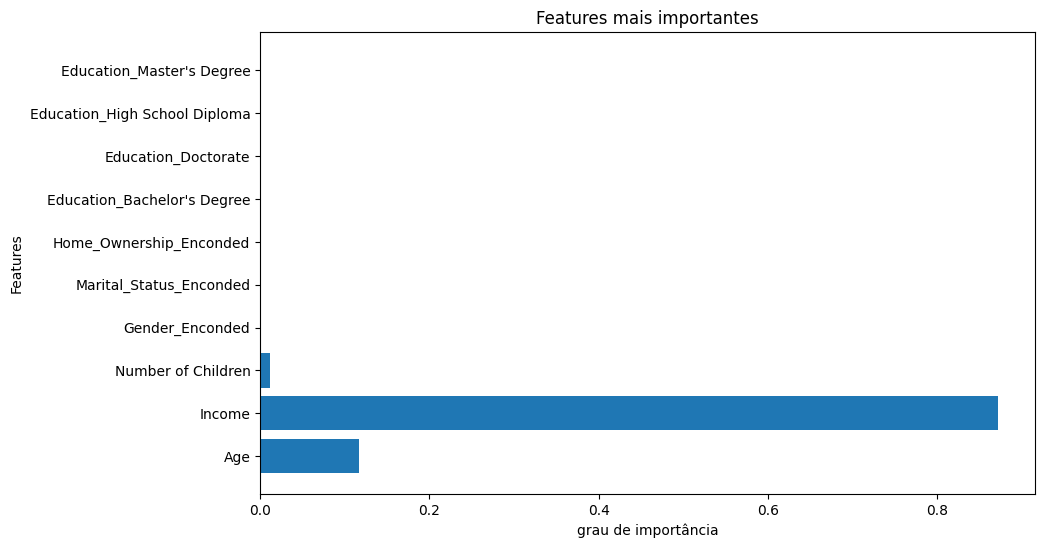

In [28]:
features_importantes = arvore_score.feature_importances_

nomes_features = X_train.columns

plt.figure(figsize=(10,6))
plt.barh(nomes_features, features_importantes)
plt.xlabel('grau de importância')
plt.ylabel('Features')
plt.title('Features mais importantes')
plt.show()

Assim como identificado no gráfico acima, as 2 features mais importantes identificadas pelo modelo foram: Renda e idade.

# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [29]:
X_train_reduzido = X_train[['Income', 'Age']]
X_test_reduzido = X_test[['Income', 'Age']]

arvore_score_reduzido = DecisionTreeClassifier(criterion='gini', random_state=0)
arvore_score_reduzido.fit(X_train_reduzido, y_train)

DecisionTreeClassifier(random_state=0)

In [30]:
previsao_reduzida = arvore_score_reduzido.predict(X_test_reduzido)
relatorio_reduzido = classification_report(y_test, previsao_reduzida)
print(f" Relatório teste: \n {relatorio_reduzido}")

 Relatório teste: 
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.91      1.00      0.95        21
           2       1.00      1.00      1.00         3

    accuracy                           0.94        32
   macro avg       0.97      0.92      0.94        32
weighted avg       0.94      0.94      0.93        32



O relatório das métricas do novo modelo demonstra que não teve alteração do modelo anterior para o modelo novo usando apenas as features mais relevantes. Como a diferença de relevancia é muito alta para renda e a maior parte das features tem relevância de 0 o modelo anterior já ignorava essas outras features o que esplicaria o motivo de ambas teram o mesmo resultado.

# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

Ambos modelos adquiriram acurária de 100% demonstrando problemas de overfitting. Porém, o algoritmo arvore de decisão parece mais razoável ser utilizado para predição de análise de crédito visto que algumas variáveis estão relacionadas entre si e ajudam a explicar a escolha de crédito. Como Naive bayes não relaciona as variáveis, nesse cenário ele deve ter uma tendência maior de ficar enviesado.